# NBA Game Prediction: Analysis
Written by Nicholas Cannon

In [58]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

GAMES_DIR = os.path.join('..', 'data', 'processed', 'games')
TEAMS_DIR = os.path.join('..', 'data', 'processed', 'teams')

## Individual Season Analysis

In [59]:
def season_analysis(path):
    df = pd.read_csv(path)
    win_details = df['HOME_WIN'].value_counts()
    
    print('-' * 60)
    print('DF Analysis: {}'.format(path))
    print('-' * 60)
    print('SHAPE =', df.shape)
    print('NaNs = ', df.isnull().values.any())
    print('Home wins = {}, Away wins = {}'.format(win_details[1], win_details[0]))
    print('Avg home points scored (rounded) = ', df['H_PTS'].mean().astype(int))
    print('Avg away points scored (rounded) = ', df['A_PTS'].mean().astype(int))
    print('-' * 60, end='\n\n')

for season in os.listdir(GAMES_DIR):
    season_analysis(os.path.join(DATA_DIR, season))

------------------------------------------------------------
DF Analysis: ../data/processed/games/22015-full.csv
------------------------------------------------------------
SHAPE = (1230, 92)
NaNs =  False
Home wins = 724, Away wins = 506
Avg home points scored (rounded) =  104
Avg away points scored (rounded) =  101
------------------------------------------------------------

------------------------------------------------------------
DF Analysis: ../data/processed/games/22014-full.csv
------------------------------------------------------------
SHAPE = (1230, 92)
NaNs =  False
Home wins = 707, Away wins = 523
Avg home points scored (rounded) =  101
Avg away points scored (rounded) =  98
------------------------------------------------------------

------------------------------------------------------------
DF Analysis: ../data/processed/games/22018-full.csv
------------------------------------------------------------
SHAPE = (1230, 92)
NaNs =  False
Home wins = 729, Away wins = 5

## Combined Season Analysis

[]

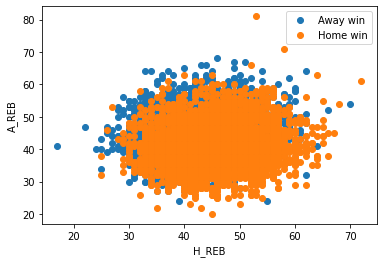

In [60]:
df = pd.DataFrame()
for season in os.listdir(GAMES_DIR):
    df = pd.concat([df, pd.read_csv(os.path.join(GAMES_DIR, season), dtype={'GAME_ID': str})], ignore_index=True)
    
X_AXIS = 'H_REB'
Y_AXIS = 'A_REB'
groups = df.groupby('HOME_WIN')
for name, group in groups:
    plt.plot(group[X_AXIS], group[Y_AXIS], linestyle='', marker='o', label='Home win' if name else 'Away win')

plt.xlabel(X_AXIS)
plt.ylabel(Y_AXIS)
plt.legend()
plt.plot()

In [64]:
game = pd.read_csv(os.path.join(TEAMS_DIR, '1610612752.csv'), dtype={'GAME_ID': str})
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GAME_ID         492 non-null    object 
 1   DATE            492 non-null    object 
 2   SEASON          492 non-null    int64  
 3   FGM             492 non-null    int64  
 4   FGA             492 non-null    int64  
 5   FG_PCT          492 non-null    float64
 6   FG3M            492 non-null    int64  
 7   FG3A            492 non-null    int64  
 8   FG3_PCT         492 non-null    float64
 9   FTM             492 non-null    int64  
 10  FTA             492 non-null    int64  
 11  FT_PCT          492 non-null    float64
 12  OREB            492 non-null    int64  
 13  DREB            492 non-null    int64  
 14  REB             492 non-null    int64  
 15  AST             492 non-null    int64  
 16  STL             492 non-null    int64  
 17  BLK             492 non-null    int

In [65]:
game.iloc[0] # home KNICKS

GAME_ID           0021300008
DATE              2013-10-30
SEASON                  2013
FGM                       36
FGA                       71
FG_PCT                 0.507
FG3M                       3
FG3A                      13
FG3_PCT                0.231
FTM                       15
FTA                       17
FT_PCT                 0.882
OREB                       6
DREB                      28
REB                       34
AST                       17
STL                       12
BLK                        6
TO                        22
PF                        16
PTS                       90
PLUS_MIN                   7
FTA_RATE               0.239
TM_TOV_PCT             0.233
OFF_RATING              95.7
DEF_RATING              88.3
AST_TOV                 0.77
EFG_PCT                0.528
TS_PCT                 0.573
PACE                      94
PIE                    0.589
PTS_OFF_TO                27
PTS_2ND_CHANCE             7
PTS_FB                    24
PTS_PAINT     